# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as bs
#from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [2]:
# executable_path = {'executable_path': ChromeDriverManager().install()}
# browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
data = requests.get(url).text

# Creating BeautifulSoup object
soup = bs(data, 'html.parser')

In [4]:
print('Classes of each table:')
for table in soup.find_all('table'):
    print(table.get('class'))

Classes of each table:
['table']


In [5]:
tables = soup.find('table')

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

mars_df = pd.DataFrame(columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp','pressure'])

# Loop through the scraped data to create a list of rows

for row in tables.find_all('tr', class_='data-row'):    
    # Find all data for each column
    columns = row.find_all('td')
    id = columns[0].text
    terrestrial_date = columns[1].text
    sol = columns[2].text
    ls = columns[3].text
    month = columns[4].text
    min_temp = columns[5].text
    pressure = columns[6].text
#Append the Dataframe with data. 
    mars_df = mars_df.append({
            'id': id, 
            'terrestrial_date': terrestrial_date, 
            'sol': sol, 
            'ls': ls, 
            'month': month, 
            'min_temp': min_temp,
            'pressure': pressure
        }, ignore_index=True)

In [7]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [8]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [9]:
# Change data types for data analysis
mars_df = mars_df.astype({
'id': float,
'terrestrial_date': 'datetime64',
'sol': int,
'ls': int,
'month': int,
'min_temp': float,
'pressure' : float
})

In [11]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                         float64
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [10]:
# 1. How many months are there on Mars?
mars_months = mars_df.groupby(['month'])
mars_months['month'].count()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [11]:
# 2. How many Martian days' worth of data are there?
martian_sol = mars_df.loc[mars_df['sol'].idxmax()]
days = martian_sol[['sol']][0]

print(f'There are {days} Martian days worth of data')

There are 1977 Martian days worth of data


In [12]:
# 3. What is the average low temperature by month?
avg_low_temp =mars_df.groupby('month')['min_temp'].mean().reset_index()
avg_low_temp

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


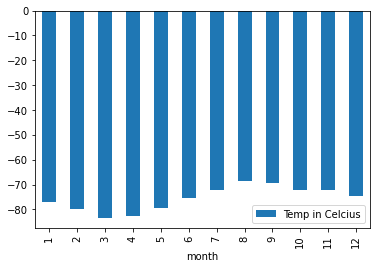

In [15]:
# Plot the average temperature by month
avg_low_temp.plot(kind='bar', y='min_temp', x='month', label = 'Temp in Celcius')

In [59]:
# Identify the coldest and hottest months in Curiosity's location
months_max_temps =mars_df.groupby('month')['min_temp'].max()
months_min_temps =mars_df.groupby('month')['min_temp'].min()
print('Month Max Temps')
print(months_max_temps)
print('Month Min Temps')
print(months_min_temps)

Month Max Temps
month
1    -62.0
2    -76.0
3    -77.0
4    -77.0
5    -74.0
6    -71.0
7    -65.0
8    -63.0
9    -63.0
10   -66.0
11   -67.0
12   -70.0
Name: min_temp, dtype: float64
Month Min Temps
month
1    -82.0
2    -86.0
3    -90.0
4    -89.0
5    -85.0
6    -84.0
7    -78.0
8    -75.0
9    -78.0
10   -81.0
11   -78.0
12   -81.0
Name: min_temp, dtype: float64


In [49]:
# Identify the coldest and hottest day in Curiosity's location


hottest_day = mars_df[mars_df.min_temp == mars_df.min_temp.max()]
coldest_day = mars_df[mars_df.min_temp == mars_df.min_temp.min()]

print(hottest_day)
print(coldest_day)

          id terrestrial_date   sol  ls  month  min_temp  pressure
1582  1614.0       2017-05-10  1692   2      1     -62.0     820.0
          id terrestrial_date   sol  ls  month  min_temp  pressure
1093  1119.0       2015-12-09  1188  79      3     -90.0     881.0


In [17]:
# 4. Average pressure by Martian month
avg_press =mars_df.groupby('month')['pressure'].mean().reset_index()
avg_press

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


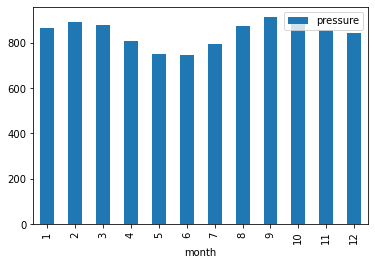

In [18]:
# Plot the average pressure by month
avg_press.plot(kind='bar', y='pressure', x='month')

In [13]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_df['terrestrial_date'].dt.year

0       2012
1       2012
2       2012
3       2012
4       2012
        ... 
1862    2018
1863    2018
1864    2018
1865    2018
1866    2018
Name: terrestrial_date, Length: 1867, dtype: int64

In [29]:
# I was unable to determine how to calcuate the total days based on this dataset. Sol is the martian days since the rover landed.
# When I group the data by year to see the Sol min and max count, the delta mode is 355 days.
# 355 is not the total days in Mars per year. 

mars_days = mars_df.groupby(mars_df['terrestrial_date'].dt.year)['sol'].agg(['min', 'max'])
mars_days['sum'] = mars_days['max'] - mars_days['min']
mars_days


,min,max,sum
terrestrial_date,,,
2012,10,143,133
2013,144,499,355
2014,500,854,354
2015,855,1209,354
2016,1210,1565,355
2017,1566,1921,355
2018,1922,1977,55


On average, the third month has the coldest minimum temperature (-90.0) on Mars, and the first month is the warmest (-62.0). But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month (745) and highest in the 2nd (889).

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [52]:
# Write the data to a CSV
mars_df.to_csv('mars_df.csv')